Projet Deep learning : Text_summarization

## Importing Data & Data undrestanding

In [1]:
# # 1
# !pip install tensorflow==2.0.0
# # 2
# !pip install keras==2.2.4
# !pip install h5py==2.9.0

In [2]:
# 3
!pip install tensorflow-gpu==1.15
# import keras==2.2.4
import numpy as np  
import pandas as pd 
import re           
import os
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
!pip install wget
import wget
import nltk


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataframe = pd.read_csv ('/content/drive/MyDrive/projet DL/20190928-reviews.csv')
dataframe=pd.DataFrame(dataframe)

In [ ]:
data=dataframe[['title','body']]

In [ ]:
data=data.rename(columns={'body': 'Text', 'title': 'Summary'})

In [ ]:
data[['Text','Summary']].sample(5)

,Text,Summary
56669,"I cannot talk about the functionality of the phone, because it was a gift. What I am happy about is the phone arrived earlier then expected. The phone looked brand new and it worked over in the Do...",Great value
60817,I love the phone but it does not let me download Instagram. It says this device it's not compatible with the app. Seller hasn't respond to my message.,Great pictures..
57741,"Does Not come in an apple box, (just charger and cable) but it looks and works like new. Good deal.","Looks like new, acts like new"
45035,"Physically, phone was great, no visible scratches... However the battery life was poor ( couldn't last a day). Phone was not unlocked to my current network as promised..In spite of all the negativ...","phone was great, no visible scratches"
81781,Best budget phone for Google fans! This phone has undoubtedly the best value of money.,Best budget phone on the market!


In [ ]:
data.shape

(82815, 2)

In [ ]:
data.drop_duplicates(subset=['Text'],inplace=True)  #dropping duplicates
data.dropna(axis=0,inplace=True)

In [ ]:
data.shape

(72622, 2)

## Data Preprocessing

0.Remove emoji

1.Convert everything to lowercase

2.Remove HTML tags

3.Contraction mapping

4.Remove (‘s)

5.Remove any text inside the parenthesis ( )

6.Eliminate punctuations and special characters

7.Remove stopwords

8.Remove short words

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [ ]:
data['Text'][:10]

0    I had the Samsung A600 for awhile which is absolute doo doo. You can read my review on it and detect my rage at the stupid thing. It finally died on me so I used this Nokia phone I bought in a gar...
1    Due to a software issue between Nokia and Sprint this phone's text messaging capabilities don't work with Sprint's system and won't until a software patch comes out "some time in the next few mont...
2    This is a great, reliable phone. I also purchased this phone after my samsung A460 died. The menu is easily comprehendable and speed dialing is available for around 300 numbers. Voice dialing is a...
3    I love the phone and all, because I really did need one, but I didn't expect the price of the bill when I received one. Also, I've had my phone for a little over two months now and still have yet ...
4    The phone has been great for every purpose it offers, except the day i bought it-i couldnt get the case off. You can take the case off to put your own pictures in the jaket wh

In [ ]:
!pip install emot


     |████████████████████████████████| 61 kB 19 kB/s 


In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

remove_emoji("Hilarious 😂! The feeling of making a sale 😎, The feeling of actually fulfilling orders 😒")

'Hilarious ! The feeling of making a sale , The feeling of actually fulfilling orders '

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = remove_emoji(text)
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in data['Text']:
    cleaned_text.append(text_cleaner(t))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data['Summary'][:10]

0                     Def not best, but not worst
1                     Text Messaging Doesn't Work
2                                 Love This Phone
3                         Love the Phone, BUT...!
4    Great phone service and options, lousy case!
5                             Worked great for me
6             Wanna cool Nokia? You have it here!
7            Problem with 3588i universal headset
8                              cool phone!!!!!!!!
9                         Pissed off-a little bit
Name: Summary, dtype: object

In [ ]:

def summary_cleaner(text):
    newString = remove_emoji(text)
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

#Call the above function
cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(summary_cleaner(t))

data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary
data['cleaned_summary'].replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

In [ ]:
data['cleaned_summary'] = data['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')


In [ ]:
for i in range(5):
    print("Review:",data['cleaned_text'][i])
    print("Summary:",data['cleaned_summary'][i])
    print("\n")

Review: samsung awhile absolute doo doo read review detect rage stupid thing finally died used nokia phone bought garage sale wonder sold cheap bad hate menu takes forever get want scroll endlessly usually phones numbered categories simply press get want pain put silent vibrate class rings turn immediately fast way silence damn thing always remember put silent learned hard way true case mission get break nails process also damage case time try reason phone started giving problems succeed opening buttons could bit bigger vibration could stronger good reception shabby using elevator remarkable feat considering old phone would lose service simply putting pocket compared old samsung phone works quite well ring tones loud enough hear phone actually charges quickly great battery life heat like potatoe oven either long phone convos nice bright large screen cute ways customize scroll bar set purple pink aqua orange etc overall okay phone serves purpose definitely pales comparison new phones co

Understanding the distribution of the sequences

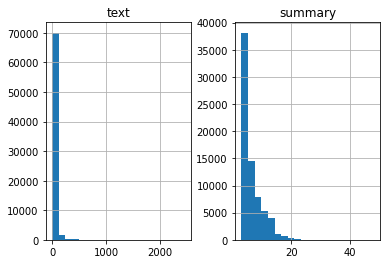

In [ ]:

import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 20)
plt.show()

In [ ]:
cnt=0
for i in data['cleaned_text']:
    if(len(i.split())<=100):
        cnt=cnt+1
cntt=0

for i in data['cleaned_summary']:
    if(len(i.split())<=15):
      cntt=cntt+1

print(cnt/len(data['cleaned_text']))
print(cntt/len(data['cleaned_summary']))

0.9573473480395547
0.9750777954498305


## Tokenizing the Text

In [ ]:
max_len_text=100 
max_len_summary=15
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(data['cleaned_text'],data['cleaned_summary'],test_size=0.1,random_state=0,shuffle=True) 


In [ ]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

In [ ]:
#preparing a tokenizer for summary on training data 
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

In [ ]:
from AttentionLayer import  AttentionLayer

## Model building

In [ ]:
from keras import backend as K 
K.clear_session() 
latent_dim = 300 

# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 300)     9207300     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 100, 300), ( 721200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
checkpoint_path = "/content/drive/MyDrive/projet DL/cp.ckpt"

In [ ]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=4)

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
x_tr
y_tr[:,:-1]
y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:]

array([[[ 77],
        [109],
        [ 15],
        ...,
        [  0],
        [  0],
        [  0]],

       [[  3],
        [ 12],
        [950],
        ...,
        [  0],
        [  0],
        [  0]],

       [[ 40],
        [  3],
        [  1],
        ...,
        [  0],
        [  0],
        [  0]],

       ...,

       [[ 18],
        [ 35],
        [  1],
        ...,
        [  0],
        [  0],
        [  0]],

       [[ 10],
        [  6],
        [  1],
        ...,
        [  0],
        [  0],
        [  0]],

       [[ 61],
        [  3],
        [  1],
        ...,
        [  0],
        [  0],
        [  0]]], dtype=int32)

In [ ]:
# model.load_weights(checkpoint_path)


In [ ]:
#get the latest checkpoint file
checkpoint_dir = os.path.dirname(checkpoint_path)
latest = tf.train.latest_checkpoint(checkpoint_dir)

In [ ]:
model.load_weights(latest)


In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=1,callbacks=[cp_callback],batch_size=500, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 65074 samples, validate on 7231 samples

Epoch 00001: saving model to /content/drive/MyDrive/projet DL/cp.ckpt
  500/65074 [..............................] - ETA: 1:18:05 - loss: 1.4808
Epoch 00001: saving model to /content/drive/MyDrive/projet DL/cp.ckpt
 1000/65074 [..............................] - ETA: 1:13:15 - loss: 1.4788
Epoch 00001: saving model to /content/drive/MyDrive/projet DL/cp.ckpt
 1500/65074 [..............................] - ETA: 1:10:47 - loss: 1.4973
Epoch 00001: saving model to /content/drive/MyDrive/projet DL/cp.ckpt
 2000/65074 [..............................] - ETA: 1:09:35 - loss: 1.4845
Epoch 00001: saving model to /content/drive/MyDrive/projet DL/cp.ckpt
 2500/65074 [>.............................] - ETA: 1:07:51 - loss: 1.4725
Epoch 00001: saving model to /content/drive/MyDrive/projet DL/cp.ckpt
 3000/65074 [>.............................] - ETA: 1:07:11 -

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.utils import plot_model
# from tensorflow import keras

# keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:

reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

## Generating Predictions

In [ ]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    #print('input_seq: {}, e_out: {} '.format(input_seq,e_out))
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
       # print("sampled_token:",sampled_token)
        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        # stop_condition = True
        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(10):
  print("Review:",seq2text(x_val[i]))
  print("Original summary:",seq2summary(y_val[i]))
  print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_text)))
  print("\n")


Review: yes samsung phones twice like battery life sucks using phone less two years needed charge several times day horrible get slow time none problem pro good quality product happy buying one wife suck samsung 
Original summary: going back to samsung never again 
Predicted summary:  great phone


Review: nice get 
Original summary: everything 
Predicted summary:  good phone


Review: really love phone smart phone first kinds touch screen smart phones coming straight garbage phone know looking get bells whistles great phone windows platform bad advertised really enjoy platform actually easy use simple learn phone lightning quick biggest pet peeve though functional pad qwerty touch screen pad get annoying overall really minor issue think phone great would trade enjoy heck simple guy fancy phone need 
Original summary: solid phone 
Predicted summary:  great phone


Review: live phone far great upgrade samsung galaxy works perfectly usa straight talk 
Original summary: works perfectly in